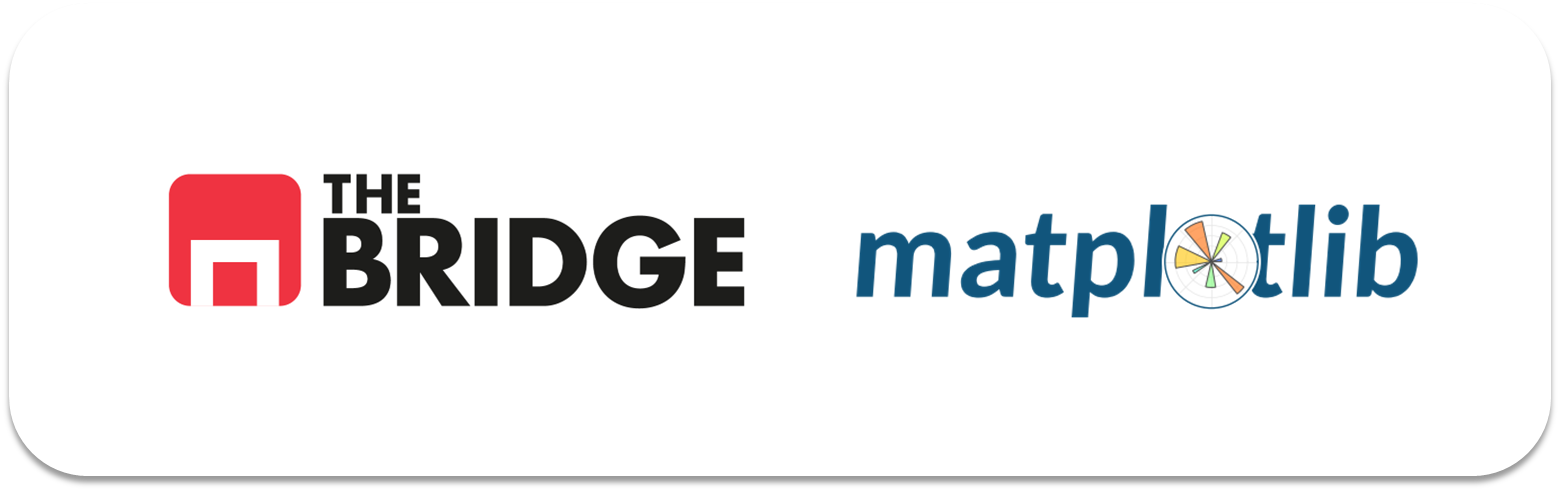

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [5]:
# Cargar el dataset
california_cities = pd.read_csv("./data/california_cities.csv")

# Eliminar filas con valores nulos
california_cities.dropna(inplace=True)

print(california_cities)


     Unnamed: 0         city       latd       longd  elevation_m  \
0             0     Adelanto  34.576111 -117.432778        875.0   
1             1  AgouraHills  34.153333 -118.761667        281.0   
4             4     Alhambra  34.081944 -118.135000        150.0   
5             5   AlisoViejo  33.575000 -117.725556        127.0   
6             6      Alturas  41.487222 -120.542500       1332.0   
..          ...          ...        ...         ...          ...   
477         477   Yountville  38.403056 -122.362222         30.0   
478         478        Yreka  41.726667 -122.637500        787.0   
479         479     YubaCity  39.134722 -121.626111         18.0   
480         480      Yucaipa  34.030278 -117.048611        798.0   
481         481  YuccaValley  34.133333 -116.416667       1027.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
0          2871.0             31765            56.027           56.009   
1           922.0             20330

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

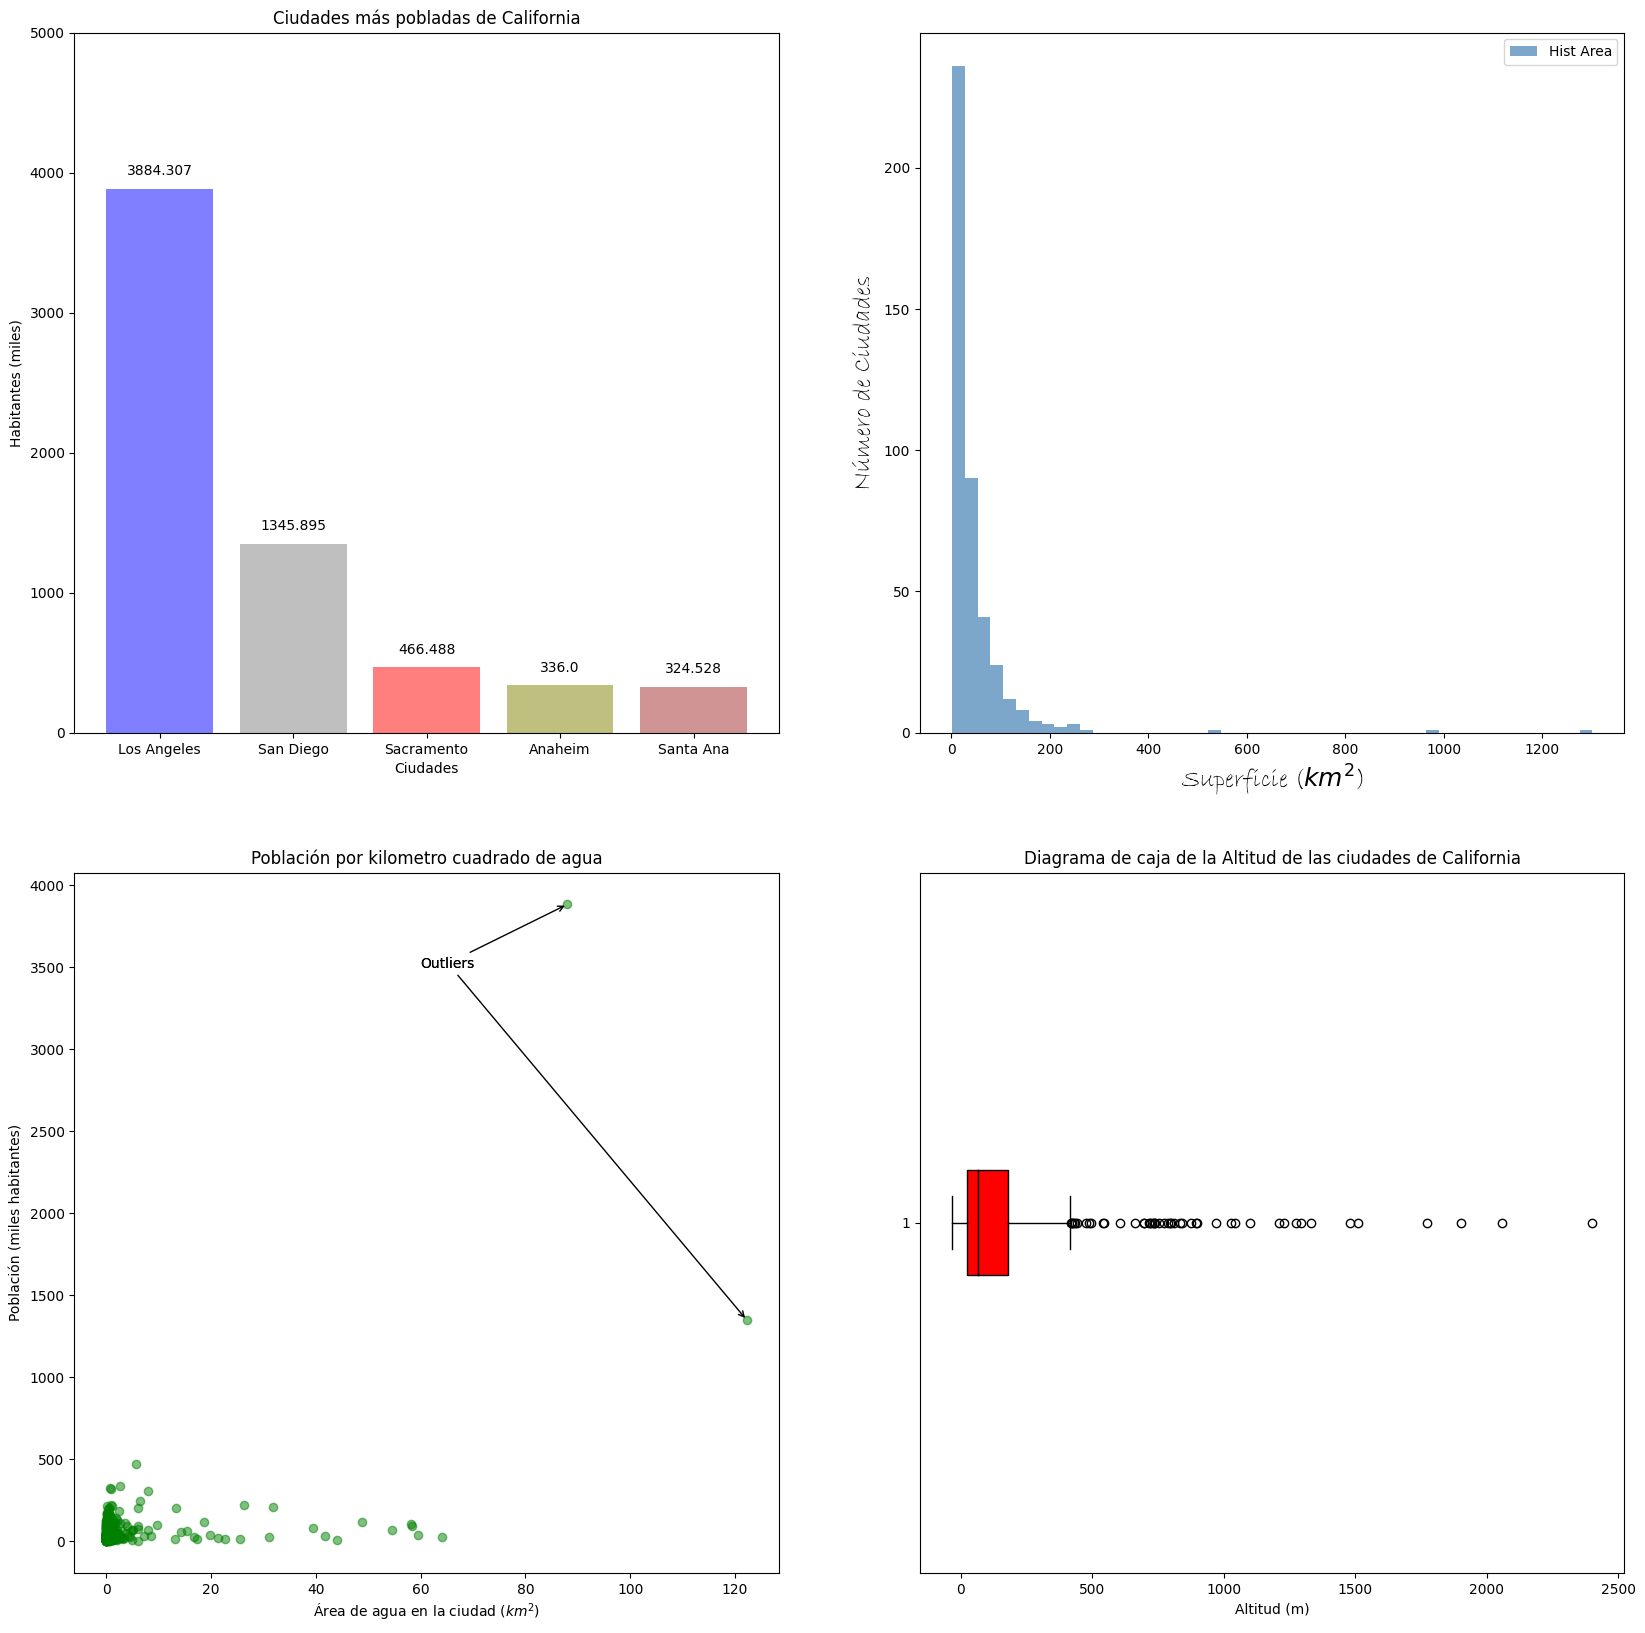

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

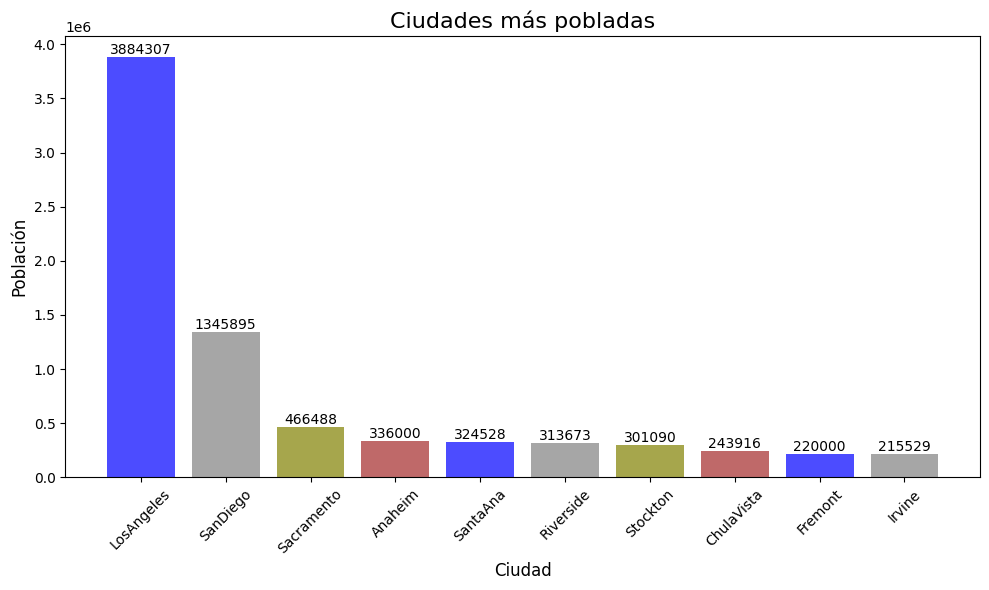

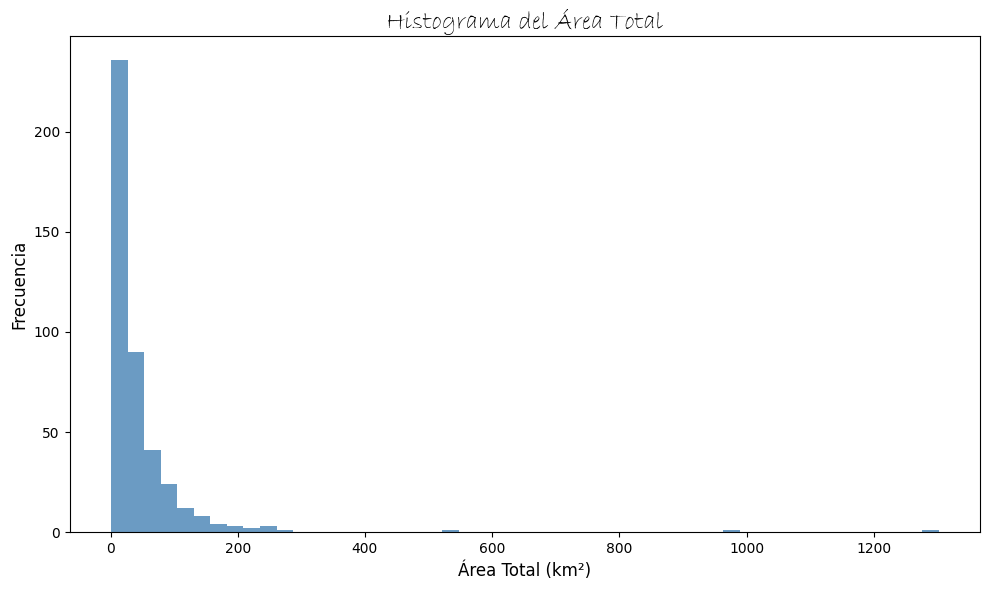

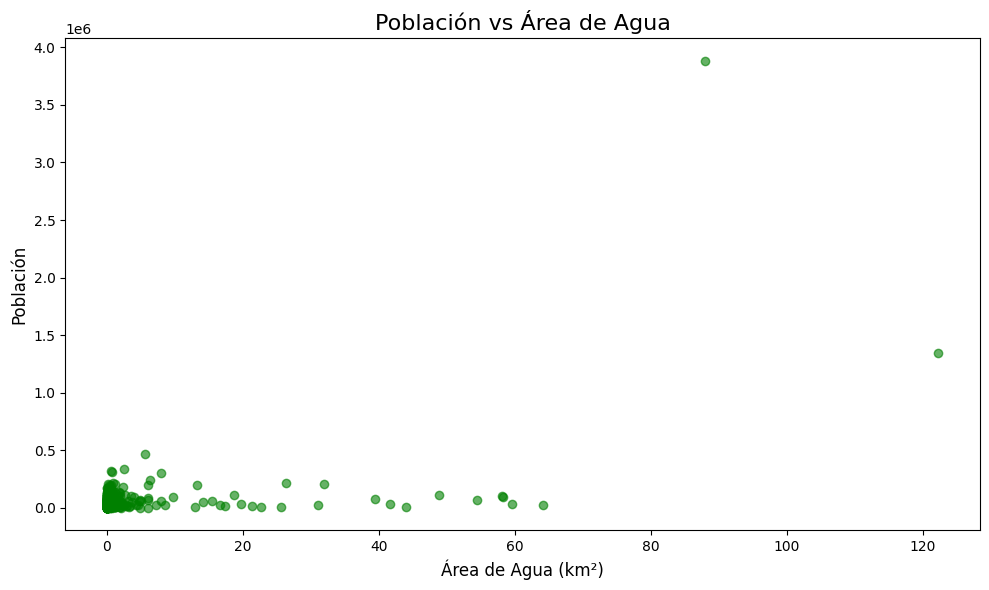

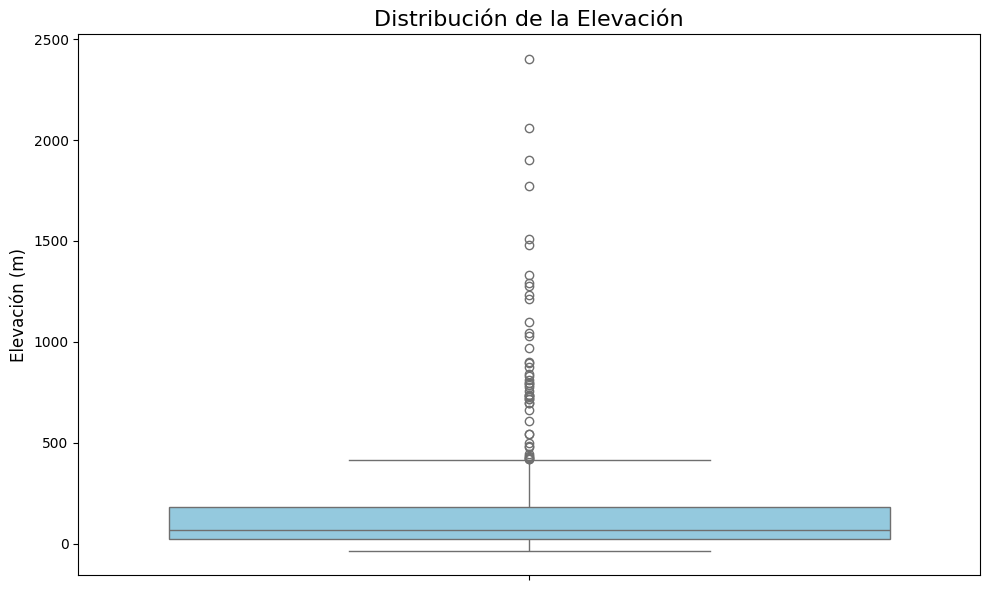

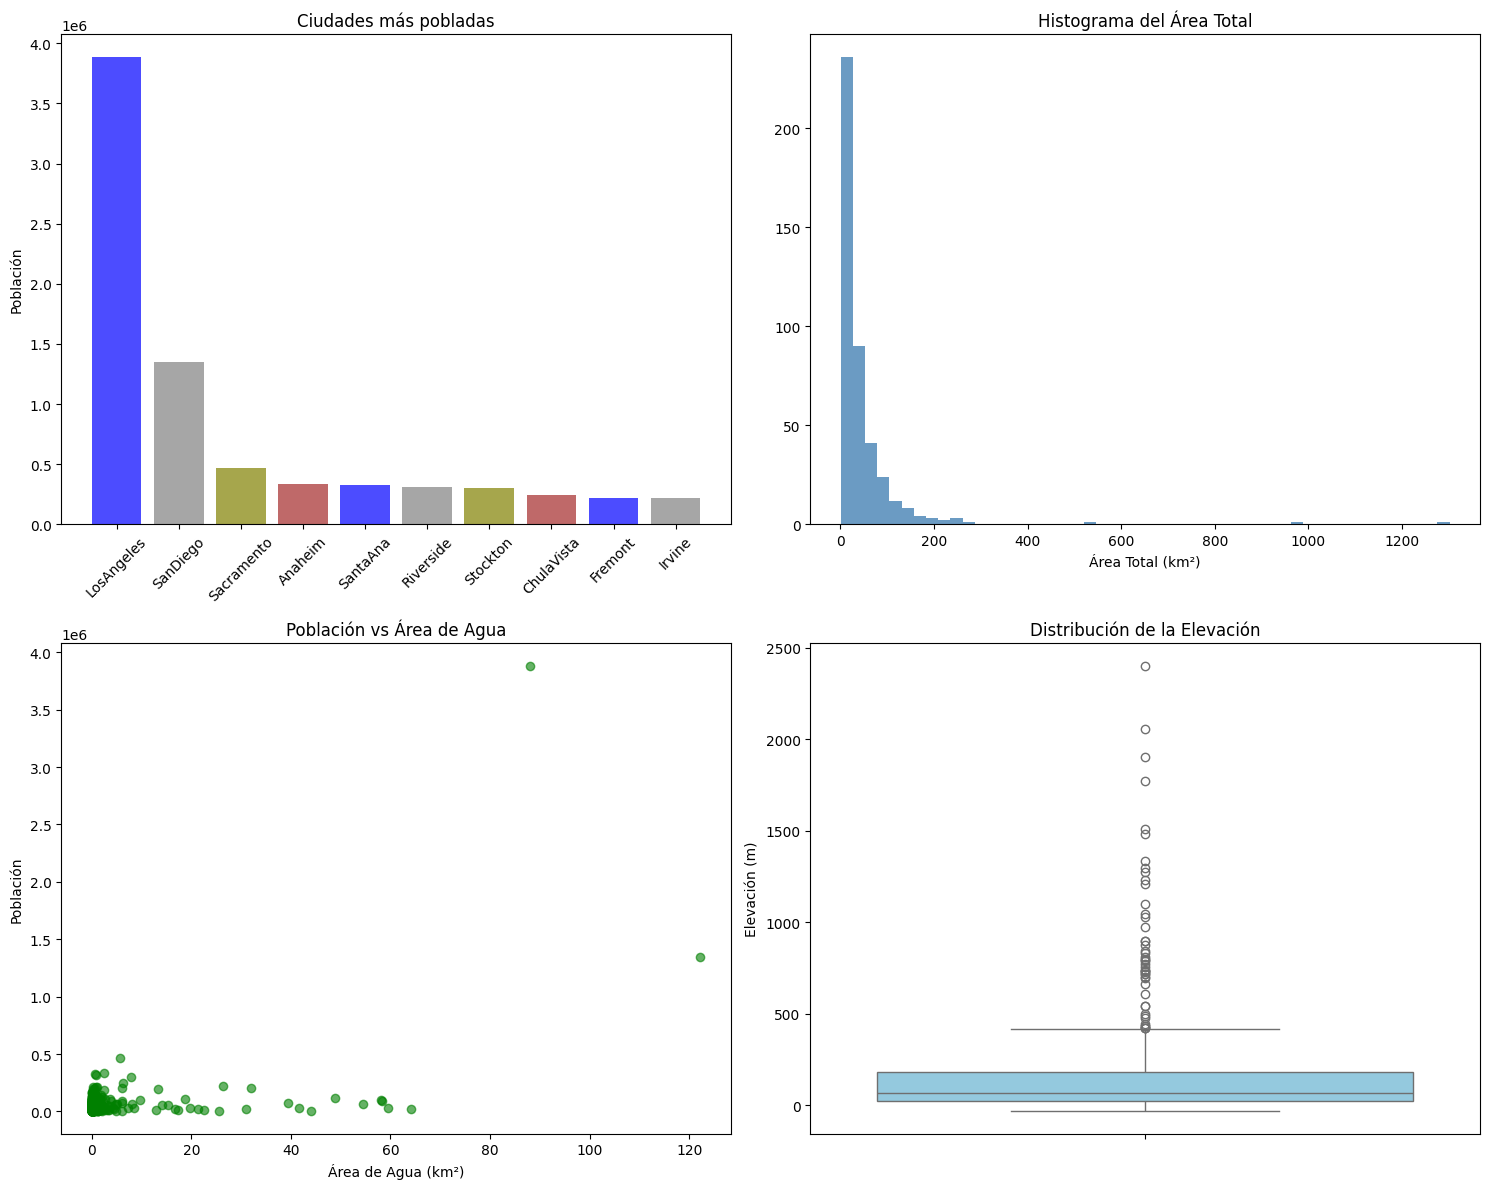

In [11]:
# ---------- Gráfico 1: Ciudades más pobladas ----------
# Seleccionar las 10 ciudades más pobladas
top_cities = california_cities.nlargest(10, 'population_total')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['blue', 'gray', 'olive', 'brown']
plt.bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)
for i, value in enumerate(top_cities['population_total']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Ciudades más pobladas', fontsize=16)
plt.ylabel('Población', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafico_top_cities.png')  # Guardar gráfico

# ---------- Gráfico 2: Histograma del área total ----------
plt.figure(figsize=(10, 6))
plt.hist(california_cities['area_total_km2'], bins=50, color='steelblue', alpha=0.8)
plt.title('Histograma del Área Total', fontsize=18, fontname='Bradley Hand ITC')
plt.xlabel('Área Total (km²)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.savefig('histograma_area_total.png')  # Guardar gráfico

# ---------- Gráfico 3: Scatter de población vs área de agua ----------
plt.figure(figsize=(10, 6))
plt.scatter(california_cities['area_water_km2'], california_cities['population_total'], color='green', alpha=0.6)
plt.title('Población vs Área de Agua', fontsize=16)
plt.xlabel('Área de Agua (km²)', fontsize=12)
plt.ylabel('Población', fontsize=12)
plt.tight_layout()
plt.savefig('scatter_population_water_area.png')  # Guardar gráfico

# ---------- Gráfico 4: Boxplot de la elevación ----------
plt.figure(figsize=(10, 6))
sns.boxplot(data=california_cities, y='elevation_m', color='skyblue')
plt.title('Distribución de la Elevación', fontsize=16)
plt.ylabel('Elevación (m)', fontsize=12)
plt.tight_layout()
plt.savefig('boxplot_elevacion.png')  # Guardar gráfico

# ---------- Combinación de los gráficos ----------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1 en la posición (0, 0)
axes[0, 0].bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)
axes[0, 0].set_title('Ciudades más pobladas')
axes[0, 0].set_ylabel('Población')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2 en la posición (0, 1)
axes[0, 1].hist(california_cities['area_total_km2'], bins=50, color='steelblue', alpha=0.8)
axes[0, 1].set_title('Histograma del Área Total')
axes[0, 1].set_xlabel('Área Total (km²)')

# Gráfico 3 en la posición (1, 0)
axes[1, 0].scatter(california_cities['area_water_km2'], california_cities['population_total'], color='green', alpha=0.6)
axes[1, 0].set_title('Población vs Área de Agua')
axes[1, 0].set_xlabel('Área de Agua (km²)')
axes[1, 0].set_ylabel('Población')

# Gráfico 4 en la posición (1, 1)
sns.boxplot(ax=axes[1, 1], data=california_cities, y='elevation_m', color='skyblue')
axes[1, 1].set_title('Distribución de la Elevación')
axes[1, 1].set_ylabel('Elevación (m)')

# Ajustar diseño
plt.tight_layout()
plt.savefig('figura_combinada.png')  # Guardar gráfico combinado
plt.show()
